### 3. Where is the housing market trending?

In [32]:
import os
import pandas as pd
import datetime as dt
from pathlib import Path
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [33]:
#Import data
ontario_dataset = pd.read_csv(Path("Resources/ONTARIO.csv")).dropna()

In [34]:
#Rename column to match with MCForecastTools library
ontario_dataset.rename(columns = {'Composite_Benchmark_SA':'close'}, inplace = True)

In [35]:
#Drop unneeded columns
ontario_dataset = ontario_dataset.drop(columns=["Composite_HPI_SA", "Single_Family_HPI_SA", "One_Storey_HPI_SA", "Two_Storey_HPI_SA", "Townhouse_HPI_SA", "Apartment_HPI_SA", "Single_Family_Benchmark_SA", "One_Storey_Benchmark_SA", "Two_Storey_Benchmark_SA", "Townhouse_Benchmark_SA", "Apartment_Benchmark_SA"])
ontario_dataset

,Date,close
0,Jan 2005,219800.0
1,Feb 2005,222500.0
2,Mar 2005,225400.0
3,Apr 2005,229300.0
4,May 2005,233000.0
...,...,...
213,Oct 2022,903500.0
214,Nov 2022,889000.0
215,Dec 2022,873100.0
216,Jan 2023,854600.0


In [36]:
#Set the index to the datetime
ontario_dataset = ontario_dataset.set_index("Date")
ontario_dataset.index = pd.to_datetime(ontario_dataset.index)
ontario_dataset

,close
Date,
2005-01-01,219800.0
2005-02-01,222500.0
2005-03-01,225400.0
2005-04-01,229300.0
2005-05-01,233000.0
...,...
2022-10-01,903500.0
2022-11-01,889000.0
2022-12-01,873100.0


In [37]:
#Concatenate the data to be consumed by the library
concat = pd.concat([ontario_dataset], axis=1, keys=["Benchmark1"]).dropna()
concat

,Benchmark1
,close
Date,
2005-01-01,219800.0
2005-02-01,222500.0
2005-03-01,225400.0
2005-04-01,229300.0
2005-05-01,233000.0
...,...
2022-10-01,903500.0
2022-11-01,889000.0


In [38]:
#InitiaL the Monte Carlo simulation
years = 10 
MC_10_year = MCSimulation(
    portfolio_data = concat, 
    weights =[1], 
    num_simulation = 500, 
    num_trading_days=12* years
)

In [39]:
#Run the Monte Carlo simulation
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.022455,0.995952,1.010449,0.994632,0.998605,0.994459,1.003142,0.994154,0.995694,0.981321,...,0.999288,1.017070,0.993102,1.011521,1.008201,1.004171,1.002648,1.009900,1.016278,1.012221
2,1.021341,0.995418,1.026602,1.013691,0.991881,0.997601,1.009403,0.985355,0.998660,0.989628,...,1.007117,1.022537,1.000458,1.018554,1.014776,1.013497,1.009578,1.012371,1.015976,1.009065
3,1.014396,1.010199,1.014863,1.010850,1.000066,1.024493,1.023975,1.002604,0.993952,1.001287,...,1.013084,1.027756,0.998939,1.018855,1.020025,1.013179,1.007873,1.031450,1.016045,0.998683
4,1.037934,1.017322,1.009443,1.016115,1.026589,1.053660,1.021101,0.996244,0.985078,1.006555,...,1.025135,1.034813,0.990403,1.034389,1.017072,1.025449,1.017681,1.039478,1.035605,1.013722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.789264,2.091943,1.613249,2.193958,2.163992,2.397546,2.154335,2.560807,1.876815,1.940164,...,2.265441,1.896799,1.819066,1.856951,2.340357,2.351940,1.754964,1.949975,2.101155,1.969572
117,1.781859,2.085582,1.587194,2.201997,2.193685,2.370587,2.189207,2.584101,1.887319,1.990527,...,2.218584,1.922593,1.861690,1.861009,2.351553,2.350248,1.770337,1.965478,2.111406,2.003259
118,1.790698,2.125215,1.596200,2.214540,2.192822,2.341597,2.182203,2.577651,1.906238,1.994695,...,2.259905,1.940823,1.919122,1.876414,2.380085,2.361152,1.734304,1.975338,2.091481,2.011495
119,1.776074,2.126157,1.589295,2.236718,2.239234,2.374800,2.189829,2.597908,1.955162,2.019240,...,2.302603,1.973730,1.937845,1.885555,2.443250,2.362182,1.731079,2.011250,2.137276,2.028968


<AxesSubplot:title={'center':'500 Simulations of Cumulative Trajectories Over the Next 120 Months.'}>

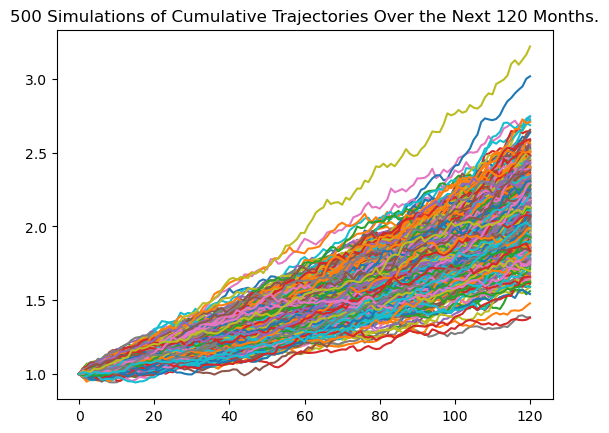

In [40]:
#Show the plot of the Monte Carlo simulation
MC_10_year.plot_simulation()

In [41]:
#Calculcate the summary data
tbl = MC_10_year.summarize_cumulative_return()
print(tbl)

count           500.000000
mean              2.110402
std               0.258205
min               1.381683
25%               1.929581
50%               2.097179
75%               2.280923
max               3.218571
95% CI Lower      1.625177
95% CI Upper      2.614254
Name: 120, dtype: float64


In [42]:
#Analysis of the data
initial_investment = 1000000

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

print(f"There is a 95% chance that an initial real estate investment of ${initial_investment:,}"
      f" over the next {years} years will end within in the range of"
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial real estate investment of $1,000,000 over the next 10 years will end within in the range of $1,625,176.6 and $2,614,254.42
